# Coding Project - Watermark: 

The code given below adds automatically a watermark to a photograph. The user can choose:
* the watermark location from five possible options.
* the transparency effect between opaque and semi-transparent.

The code works with different colored photographs. The resulting image is saved in the current working directory as 'result.jpg'.

To illustrate, here's a possible result:

<img src='./road_wt.jpg' width="500px" />

The watermark is semi-transparent and positioned down-right the photograph.

----

**How the algorithm is implemented:**

1. Loop over all pixels watermark:

       Check if pixel is white
           Add pixel on the photograph, at chosen position and with chosen transparency effect      
           
2. Save result as an image in current directory
3. Display the resulting image
        



Choose the watermark location: A:center, B:upper-left, C:upper-right, D:down-left, E:down-right.


Enter your value:  A


Choose the degree of transparency: 0:opaque, 1:semi-transparent.


Enter your value:  1


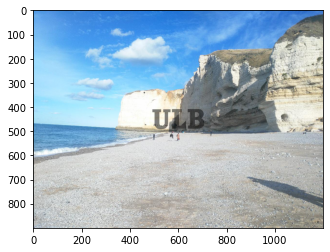

In [6]:
# ---- code here ---- #
#The photograph for the test is 'etretat.jpg'

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from skimage.io import imread,imsave,imshow

watermark = imread("watermark.png")
photograph = imread("etretat.jpg")
photograph_watermark = photograph.copy()

print('Choose the watermark location: A:center, B:upper-left, C:upper-right, D:down-left, E:down-right.')
while True: 
    position = input('Enter your value: ')
    if position not in ('A','B','C','D','E'):
        print("Pick an answer from A to E.")
    else:
        break

print('Choose the degree of transparency: 0:opaque, 1:semi-transparent.')
while True:
    transparency = input('Enter your value: ')
    if transparency not in ('0','1'):
        print('Pick an answer between 0:opaque and 1:semi-transparent.')
    else:
        break
#Add the white pixels of watermark on the photograph, on chosen position and with chosen transparency:
mask = watermark == 255
yaxis = photograph.shape[0]
xaxis = photograph.shape[1]
yaxis_logo = watermark.shape[0]
xaxis_logo = watermark.shape[1]
transparency = int(transparency)

for i in range (watermark.shape[0]) : 
    for j in range (watermark.shape[1]) :
        if (mask[i,j]):
            if ( position == 'A'):
                photograph_watermark[(yaxis//2-yaxis_logo//2)+i,(xaxis//2-xaxis_logo//2)+j] = photograph_watermark[(yaxis//2-yaxis_logo//2)+i,(xaxis//2-xaxis_logo//2)+j]//2*transparency + (watermark[i,j] - 255)*(1-transparency)
            elif ( position == 'B'):
                photograph_watermark[i,j] =  photograph_watermark[i,j]//2*transparency + (watermark[i,j] - 255)*(1-transparency)
            elif( position == 'C'):
                photograph_watermark[i, xaxis-xaxis_logo+j] = photograph_watermark[i,xaxis-xaxis_logo+j]//2*transparency + (watermark[i,j] - 255)*(1-transparency)
            elif( position == 'D'):
                photograph_watermark[yaxis-yaxis_logo+i,j] = photograph_watermark[yaxis-yaxis_logo+i,j]//2*transparency + (watermark[i,j] - 255)*(1-transparency)
            elif( position == 'E'):
                photograph_watermark[yaxis-yaxis_logo+i,xaxis-xaxis_logo+j] = photograph_watermark[yaxis-yaxis_logo+i,xaxis-xaxis_logo+j]//2*transparency + (watermark[i,j] - 255)*(1-transparency)

#Save the resulting image as an image:
import os
current_directory = os.getcwd()
result = 'result.jpg'
imsave(os.path.join(current_directory, result), photograph_watermark)

#Display the resulting image:
show_result = imread("result.jpg")
plt.figure()
plt.imshow(show_result)





